In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_DIRECTORY = "../data"
DATA_FILE = "stencil_avx2.csv"

In [3]:
df = pd.read_csv(DATA_DIRECTORY + '/' + DATA_FILE, sep=',').drop(columns=['nb_iterations', 'nb_repeat', 'rep', 'check_status']);df

,kernel,mesh_width,mesh_height,timing
0,stencil_avx2,5,5,0.000061
1,stencil_avx2,5,5,0.000054
2,stencil_avx2,5,5,0.000054
3,stencil_avx2,5,5,0.000054
4,stencil_avx2,5,5,0.000054
...,...,...,...,...
3375,stencil,2000,2000,4.266184
3376,stencil,2000,2000,4.269277
3377,stencil,2000,2000,4.207338
3378,stencil,2000,2000,4.207498


In [5]:
df_ref = df[df['kernel'] == 'stencil']
df_ref = df_ref.groupby(['kernel','mesh_width','mesh_height'])['timing'].median().reset_index();df_ref

,kernel,mesh_width,mesh_height,timing
0,stencil,5,5,0.000024
1,stencil,5,10,0.000040
2,stencil,5,15,0.000057
3,stencil,5,20,0.000036
4,stencil,5,25,0.000036
...,...,...,...,...
164,stencil,2000,45,0.068497
165,stencil,2000,50,0.079271
166,stencil,2000,100,0.164596
167,stencil,2000,1000,1.610993


In [9]:
df_test = df[df['kernel'] == 'stencil_avx2']
df_test = df_test.groupby(['kernel', 'mesh_width', 'mesh_height'])['timing'].median().reset_index();df_test

,kernel,mesh_width,mesh_height,timing
0,stencil_avx2,5,5,0.000054
1,stencil_avx2,5,10,0.000060
2,stencil_avx2,5,15,0.000055
3,stencil_avx2,5,20,0.000073
4,stencil_avx2,5,25,0.000083
...,...,...,...,...
164,stencil_avx2,2000,45,0.016536
165,stencil_avx2,2000,50,0.018457
166,stencil_avx2,2000,100,0.037890
167,stencil_avx2,2000,1000,0.360737


In [10]:
df_merged = pd.merge(df_test, df_ref[['mesh_width', 'mesh_height', 'timing']], on=['mesh_width', 'mesh_height'], how='left', suffixes=('', '_ref'));df_merged

,kernel,mesh_width,mesh_height,timing,timing_ref
0,stencil_avx2,5,5,0.000054,0.000024
1,stencil_avx2,5,10,0.000060,0.000040
2,stencil_avx2,5,15,0.000055,0.000057
3,stencil_avx2,5,20,0.000073,0.000036
4,stencil_avx2,5,25,0.000083,0.000036
...,...,...,...,...,...
164,stencil_avx2,2000,45,0.016536,0.068497
165,stencil_avx2,2000,50,0.018457,0.079271
166,stencil_avx2,2000,100,0.037890,0.164596
167,stencil_avx2,2000,1000,0.360737,1.610993


In [11]:
df_merged['speedup'] = df_merged['timing_ref'] / df_merged['timing'];df_merged

,kernel,mesh_width,mesh_height,timing,timing_ref,speedup
0,stencil_avx2,5,5,0.000054,0.000024,0.452564
1,stencil_avx2,5,10,0.000060,0.000040,0.667946
2,stencil_avx2,5,15,0.000055,0.000057,1.038711
3,stencil_avx2,5,20,0.000073,0.000036,0.497328
4,stencil_avx2,5,25,0.000083,0.000036,0.433797
...,...,...,...,...,...,...
164,stencil_avx2,2000,45,0.016536,0.068497,4.142205
165,stencil_avx2,2000,50,0.018457,0.079271,4.294892
166,stencil_avx2,2000,100,0.037890,0.164596,4.344105
167,stencil_avx2,2000,1000,0.360737,1.610993,4.465838


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


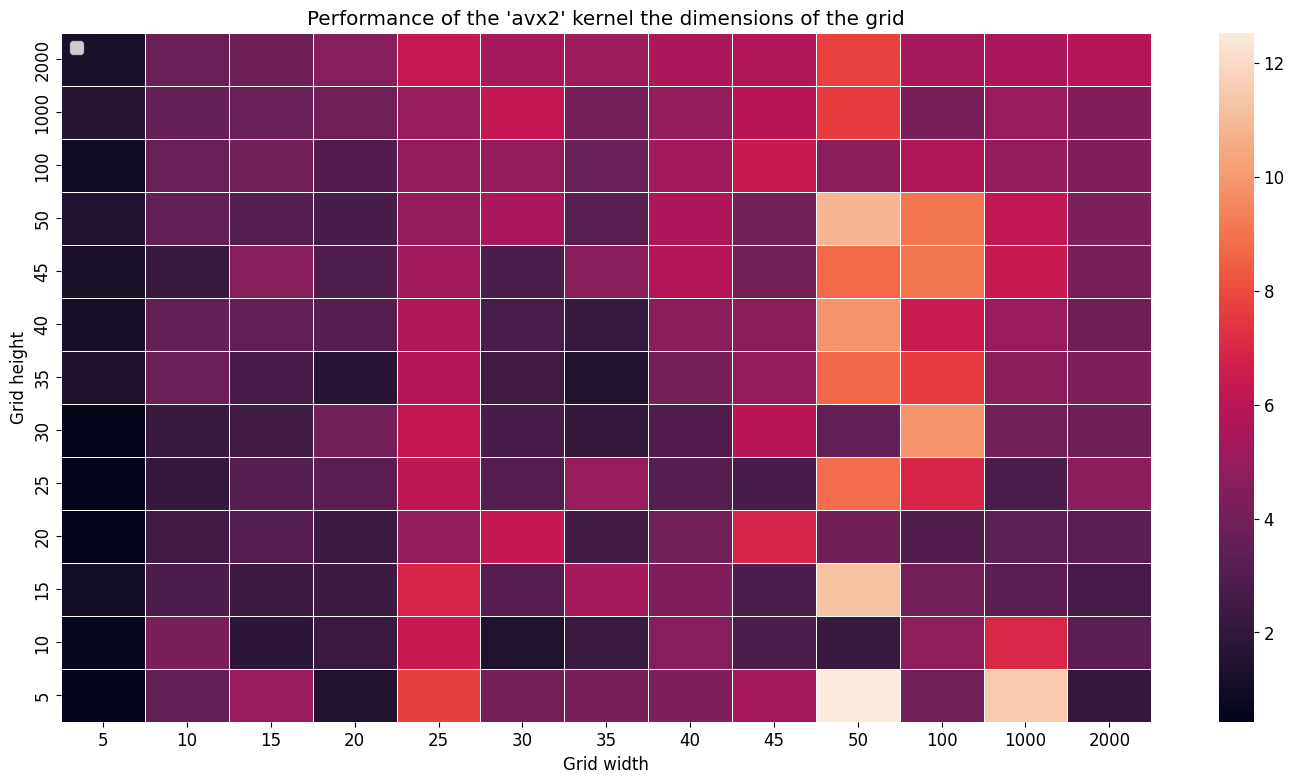

In [26]:
heatmap = pd.pivot_table(df_merged, values='speedup', index='mesh_height', columns=['mesh_width'])
fig, ax = plt.subplots(figsize=(14.5,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(heatmap, annot=False, linewidths=.5, ax=ax)
ax.invert_yaxis()
plt.legend(loc='upper left')
plt.title("Performance of the 'avx2' kernel the dimensions of the grid")
plt.tight_layout()
plt.xlabel('Grid width')
plt.ylabel('Grid height')
plt.savefig("../plots/stencil/avx2_speedup.png", format='png')
plt.show()